<a href="https://colab.research.google.com/github/dhiyasalmas/Basic-Image-Processing/blob/main/Module_Basic_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Session 1***

#Install OpenCV

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Image Read

In [ ]:
import cv2
import matplotlib.pyplot as plt

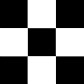

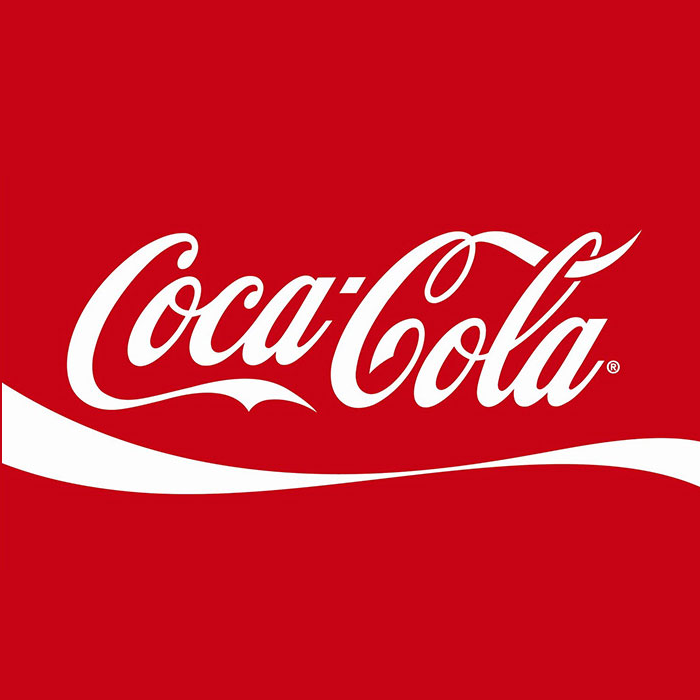

In [ ]:
from google.colab.patches import cv2_imshow
cb_img = cv2.imread("checkerboard_84x84.jpg")
cv2_imshow(cb_img)
coke_img = cv2.imread("coca-cola-logo.png")
cv2_imshow(coke_img)

# Basic Image Manipulations
* Accessing and manipulating images pixels
* Image resizing
* Cropping
* Flipping


## Accessing Individual Pixels



In [ ]:
# print the first pixel of the first black box
print(cb_img[0,0])
# print the first white pixel to the right of the first black box
print(coke_img[0,6])

[233 241 235]
[ 21   4 199]


# Modifying Image Pixels</font>

[[[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]

 [[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]

 [[ 21   4 199]
  [ 21   4 199]
  [200 200 200]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]

 ...

 [[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]

 [[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]

 [[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]]


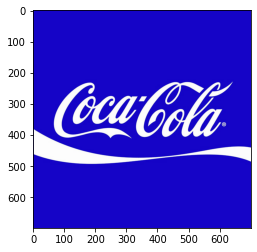

In [ ]:
cb_img_copy = coke_img.copy()
cb_img_copy[2,2] = 200
cb_img_copy[2,3] = 200
cb_img_copy[3,2] = 200
cb_img_copy[3,3] = 200

# Same as above
# cb_img_copy[2:3,2:3] = 200

plt.imshow(cb_img_copy, cmap='gray')
print(cb_img_copy)

# Cropping Images

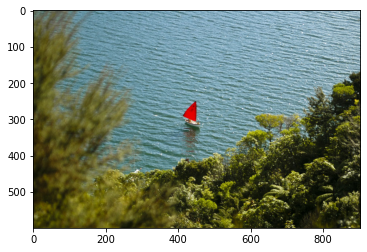

In [ ]:
img_NZ_bgr = cv2.imread("New_Zealand_Boat.jpg",cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:,:,::-1]

plt.imshow(img_NZ_rgb)

### Crop out the middle region of the image

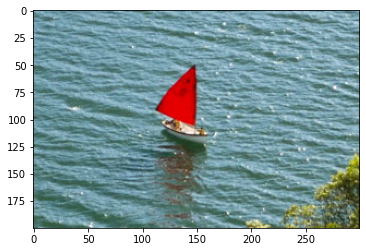

In [ ]:
cropped_region = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)

# Resizing Images

The function **`resize`** resizes the image `src` down to or up to the specified size. The size and type are derived from the `src`,`dsize`,`fx`, and `fy`.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
```

`dst`: output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

The function has **2 required arguments**:
    
1. `src`:	input image
2. `dsize`: output image size

Optional arguments that are often used include:

1. `fx`: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜
2. `fy`: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜

The output image has the size `dsize` (when it is non-zero) or the size computed from `src.size()`, `fx`, and `fy`; the type of dst is the same as of src.

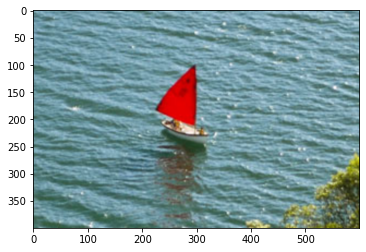

In [ ]:
resized_cropped_region_2x = cv2.resize(cropped_region,None,fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

### Medthod 2: Specifying exact size of the output image

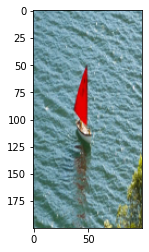

In [ ]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Resize background image to sae size as logo image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

### Resize while maintaining aspect ratio

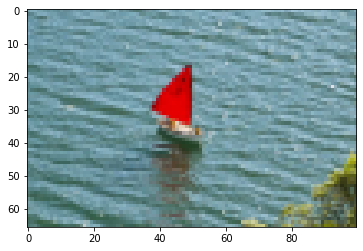

In [ ]:
# Method 2: Using 'dsize'
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Resize image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

# Flipping Images


The function **`flip`** flips the array in one of three different ways (row and column indices are 0-based):

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv.flip( src, flipCode )
```

`dst`: output array of the same size and type as src.

The function has **2 required arguments**:
    
1. `src`:	input image
2. `flipCode`: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.

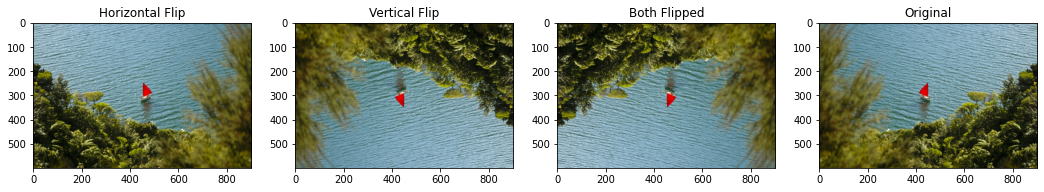

In [ ]:
img_NZ_rgb_flipped_horz = cv2.flip(img_NZ_rgb, 1)
img_NZ_rgb_flipped_vert = cv2.flip(img_NZ_rgb, 0)
img_NZ_rgb_flipped_both = cv2.flip(img_NZ_rgb, -1)

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(141);plt.imshow(img_NZ_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_NZ_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_NZ_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Original");


# **Break Time**



#***Session 2***

# <font style="color:black">Annotating Images</font>

In this notebook we will cover how to annotate images using OpenCV. We will learn how to peform the following annotations to images.

* Draw lines
* Draw circles
* Draw rectangles
* Add text

In [ ]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)
from IPython.display import Image

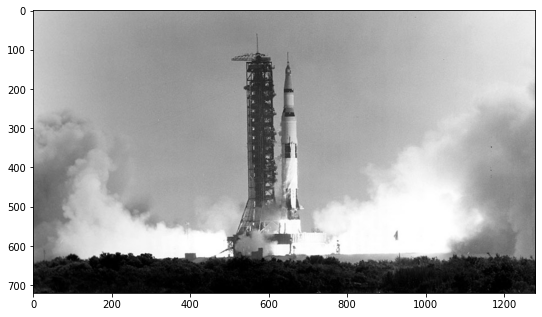

In [ ]:
# Read in an image
image = cv2.imread("Apollo_11_Launch.jpg", cv2.IMREAD_COLOR)

# Display the original image
plt.imshow(image[:,:,::-1])

## <font style="color:black">Drawing a Line</font>


Let's start off by drawing a line on an image. We will use cv2.line function for this.

### <font style="color:rgb(8,133,37)">Function Syntx</font>
``` python
    img = cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
```

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`:   Image on which we will draw a line
2. `pt1`:   First point(x,y location) of the line segment
3. `pt2`:   Second point of the line segment
4. `color`: Color of the line which will be drawn
    
Other optional arguments that are important for us to know include:

1. `thickness`: Integer specifying the line thickness. Default value is 1.
2. `lineType`:  Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.

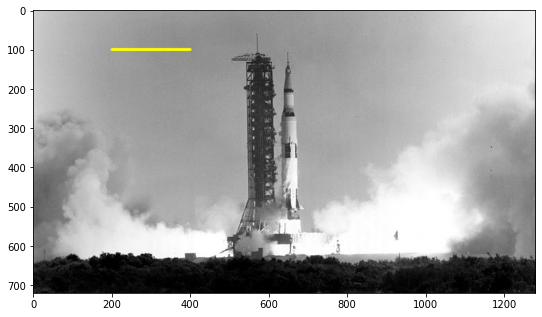

In [ ]:
imageLine = image.copy()

# The line starts from (200,100) and ends at (400,100)
# The color of the line is YELLOW (Recall that OpenCV uses BGR format)
# Thickness of line is 5px
# Linetype is cv2.LINE_AA

cv2.line(imageLine, (200, 100), (400, 100), (0, 255, 255), thickness=5, lineType=cv2.LINE_AA);

# Display the image
plt.imshow(imageLine[:,:,::-1])

## Drawing a Circle


### Functional syntx
``` python
img = cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
```

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`:    Image on which we will draw a line
2. `center`: Center of the circle
3. `radius`: Radius of the circle
4. `color`:  Color of the circle which will be drawn
    
Next, let's check out the (optional) arguments which we are going to use quite extensively.

1. `thickness`: Thickness of the circle outline (if positive).
If a negative value is supplied for this argument, it will result in a filled circle.
2. `lineType`:  Type of the circle boundary. This is exact same as lineType argument in **cv2.line**

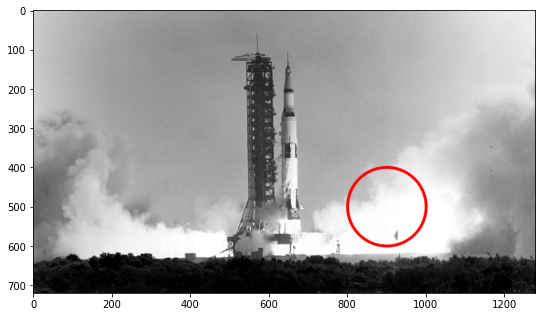

In [ ]:
# Draw a circle
imageCircle = image.copy()

cv2.circle(imageCircle, (900,500), 100, (0, 0, 255), thickness=5, lineType=cv2.LINE_AA);

# Display the image
plt.imshow(imageCircle[:,:,::-1])


We will use **cv2.rectangle** function to draw a rectangle on an image. The function syntax is as follows.

### <font style="color:rgb(8,133,37)">Functional syntx</font>

    img = cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`: Image on which the rectangle is to be drawn.
2. `pt1`: Vertex of the rectangle. Usually we use the **top-left vertex** here.
3. `pt2`: Vertex of the rectangle opposite to pt1. Usually we use the **bottom-right**              vertex here.
4. `color`: Rectangle color
    
Next, let's check out the (optional) arguments which we are going to use quite extensively.

1. `thickness`: Thickness of the circle outline (if positive).
    If a negative value is supplied for this argument, it will result in a filled rectangle.
2. `lineType`: Type of the circle boundary. This is exact same as lineType argument in
    **cv2.line**


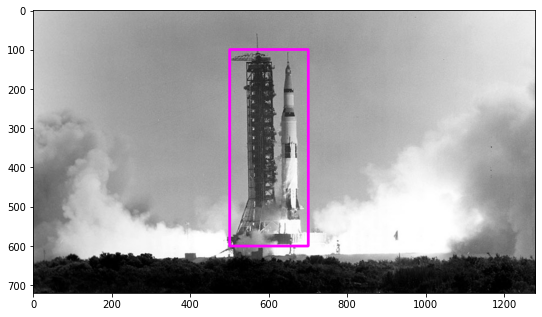

In [ ]:
# Draw a rectangle (thickness is a positive integer)
imageRectangle = image.copy()

cv2.rectangle(imageRectangle, (500, 100), (700,600), (255, 0, 255), thickness=5, lineType=cv2.LINE_8);

# Display the image
plt.imshow(imageRectangle[:,:,::-1])

## <font style="color:black">Adding Text</font>

### <font style="color:rgb(8,133,37)">Functional syntx</font>

    img = cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

`img`: The output image that has been annotated.

The function has **6 required arguments**:

1. `img`: Image on which the text has to be written.
2. `text`: Text string to be written.
3. `org`: Bottom-left corner of the text string in the image.
4. `fontFace`: Font type
5. `fontScale`: Font scale factor that is multiplied by the font-specific base size.
6. `color`: Font color

Other optional arguments that are important for us to know include:

1. `thickness`: Integer specifying the line thickness for the text. Default value is 1.
2. `lineType`: Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.

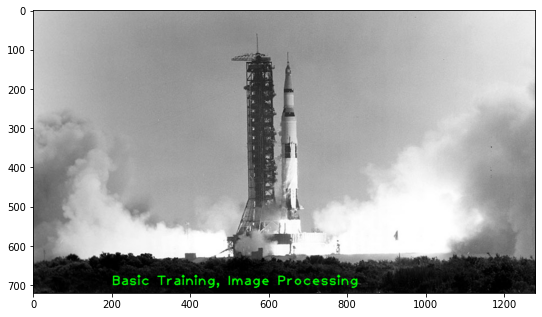

In [ ]:
imageText = image.copy()
text = "Basic Training, Image Processing"
fontScale = 2.3
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (0, 255, 0)
fontThickness = 2

cv2.putText(imageText, text, (200, 700), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);

# Display the image
plt.imshow(imageText[:,:,::-1])

# **Break Time**

# **Session 3**

# Basic Image Enhancement Using Mathematical Operations


In [ ]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from IPython.display import Image

### <font color="green">Original image</font>

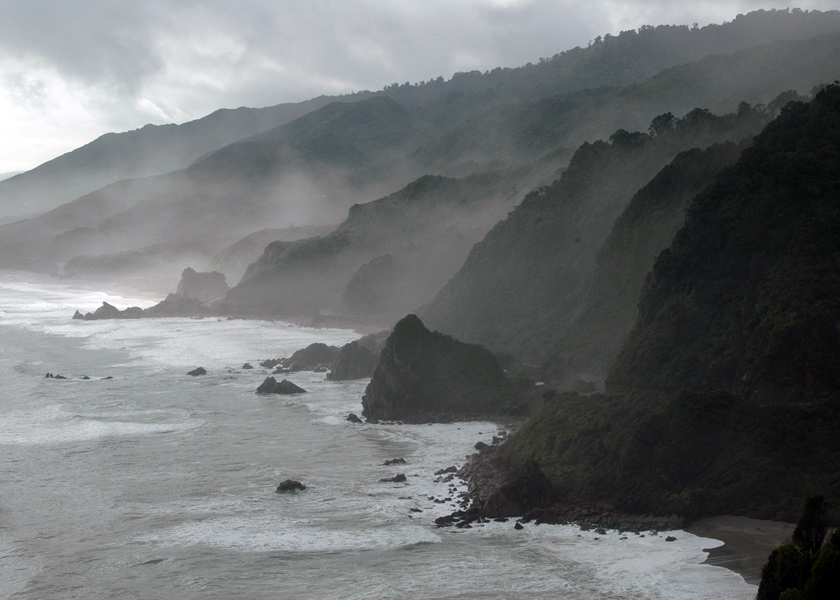

In [ ]:
img_bgr = cv2.imread("New_Zealand_Coast.jpg",cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display 18x18 pixel image.
Image(filename='New_Zealand_Coast.jpg')

## Addition or Brightness

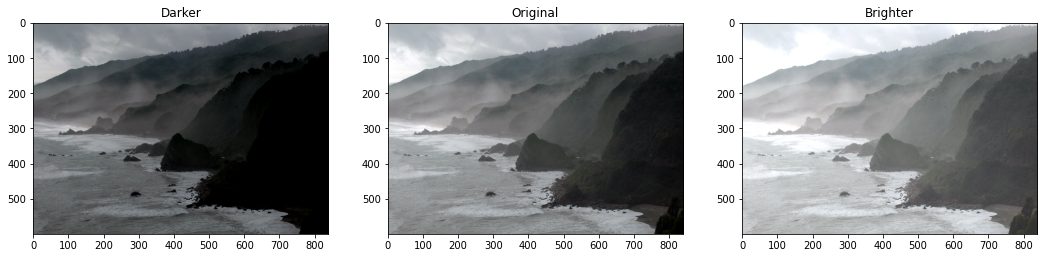

In [ ]:
matrix = np.ones(img_rgb.shape, dtype = "uint8") * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker   = cv2.subtract(img_rgb, matrix)

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Brighter");

## Multiplication or Contrast

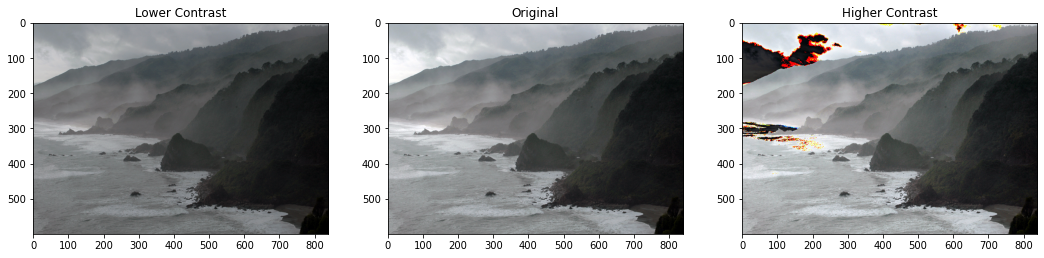

In [ ]:
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker   = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast");

### Handling Overflow using np.clip

In [ ]:
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_lower   = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher  = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2),0,255))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_lower);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_higher);plt.title("Higher Contrast");

## Image Thresholding

### Function Syntax

``` python
retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )
```

`dst`: The output array of the same size and type and the same number of channels as `src`.

The function has **4 required arguments**:

1. `src`: input array (multiple-channel, 8-bit or 32-bit floating point).
2. `thresh`: threshold value.
3. `maxval`: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.
4. `type`: thresholding type (see ThresholdTypes).


### Function Syntax

``` python
dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst] )
```

`dst`	Destination image of the same size and the same type as src.

The function has **6 required arguments**:
1. `src`:	Source 8-bit single-channel image.

2. `maxValue`:	Non-zero value assigned to the pixels for which the condition is satisfied
3. `adaptiveMethod`:	Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.
4. `thresholdType:`	Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.
5. `blockSize`:	Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
6. `C`:	Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

(572, 800)


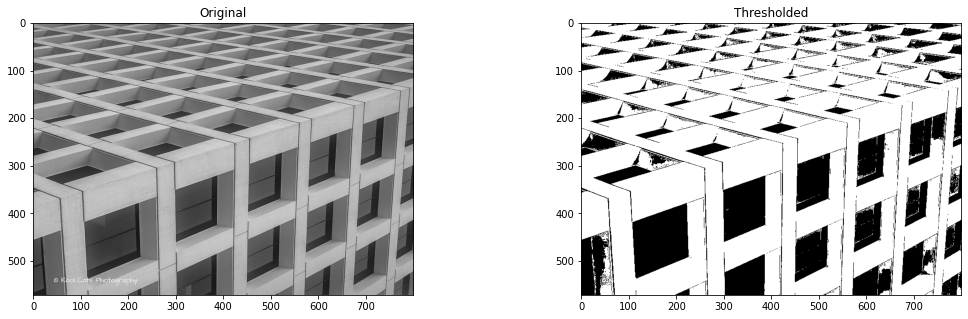

In [ ]:
img_read = cv2.imread("building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(121); plt.imshow(img_read, cmap="gray");         plt.title("Original");
plt.subplot(122); plt.imshow(img_thresh, cmap="gray");       plt.title("Thresholded");

print(img_thresh.shape)

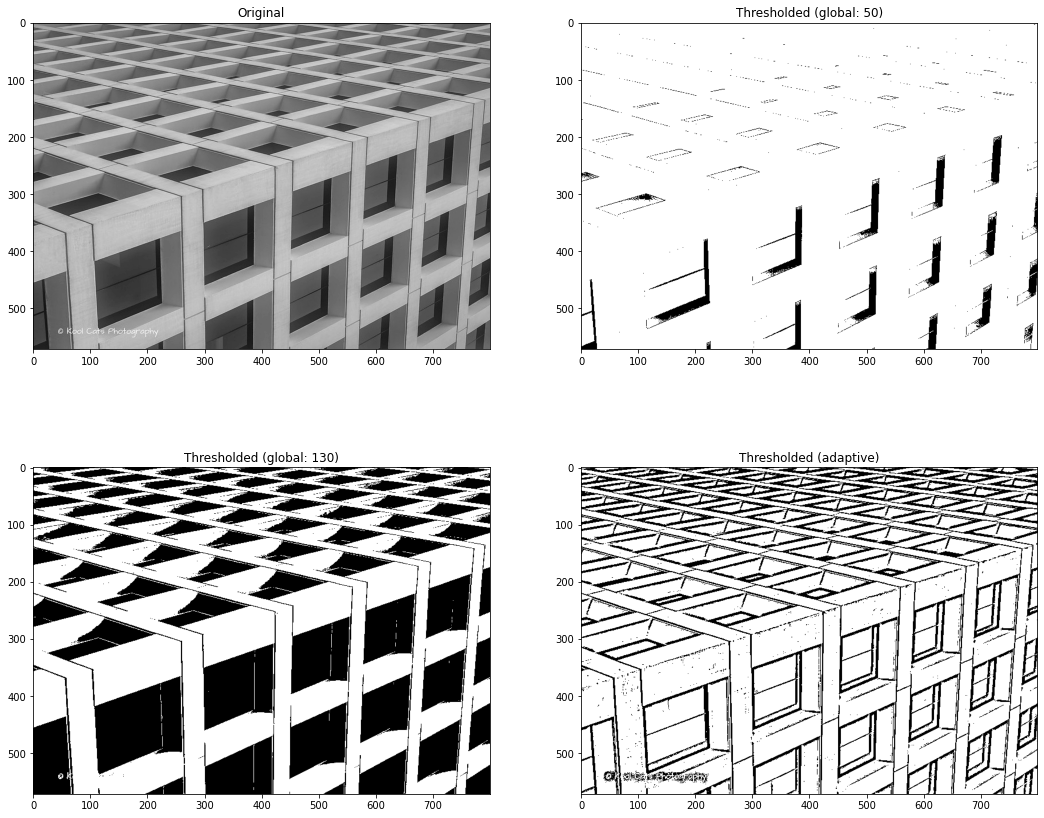

In [ ]:
# Read the original image
img_read = cv2.imread("building-windows.jpg", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img_read,50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img_read,130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

## Application: Logo Manipulation

### Read Foreground image

(700, 700, 3)


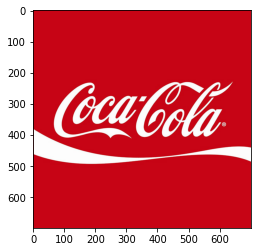

In [ ]:
img_bgr = cv2.imread("coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape)
logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

### Read Background image

(700, 700, 3)


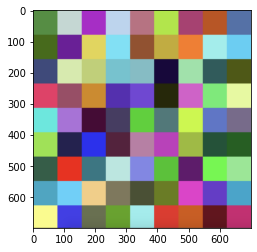

In [ ]:
# Read in image of color cheackerboad background
img_background_bgr = cv2.imread("checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

# Set desired width (logo_w) and maintain image aspect ratio
aspect_ratio = logo_w / img_background_rgb.shape[1]
dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

# Resize background image to sae size as logo image
img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

### Create Mask for original Image

(700, 700)


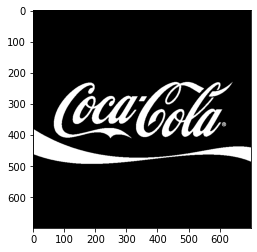

In [ ]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to creat a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

plt.imshow(img_mask,cmap="gray")
print(img_mask.shape)

### Invert the Mask

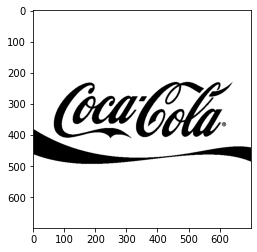

In [ ]:
# Create an inverse mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv,cmap="gray")

### Apply background on the Mask

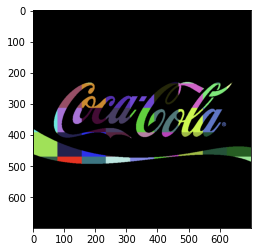

In [ ]:
# Create colorful background "behind" the logo lettering
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

### Isolate foreground from image



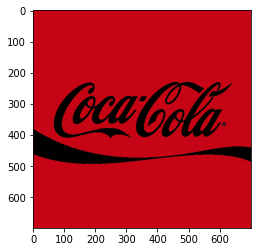

In [ ]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

### Result: Merge Foreground and Background

True

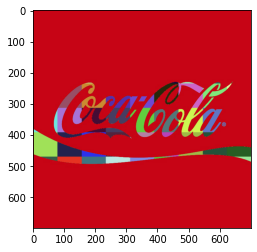

In [ ]:
# Add the two previous results obtain the final result
result = cv2.add(img_background,img_foreground)
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:,:,::-1])

# **Break Time**

# **Session 4**

# Creating Panoramas
**Steps for Creating Panoramas**

1. Find keypoints in all images
2. Find pairwise correspondences
2. Estimate pairwise Homographies
3. Refine Homographies
3. Stitch with Blending

In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt
import math

In [ ]:
# Read Images
imagefiles = glob.glob("boat/*")
imagefiles.sort()

images = []
for filename in imagefiles:
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  images.append(img)

num_images = len(images)


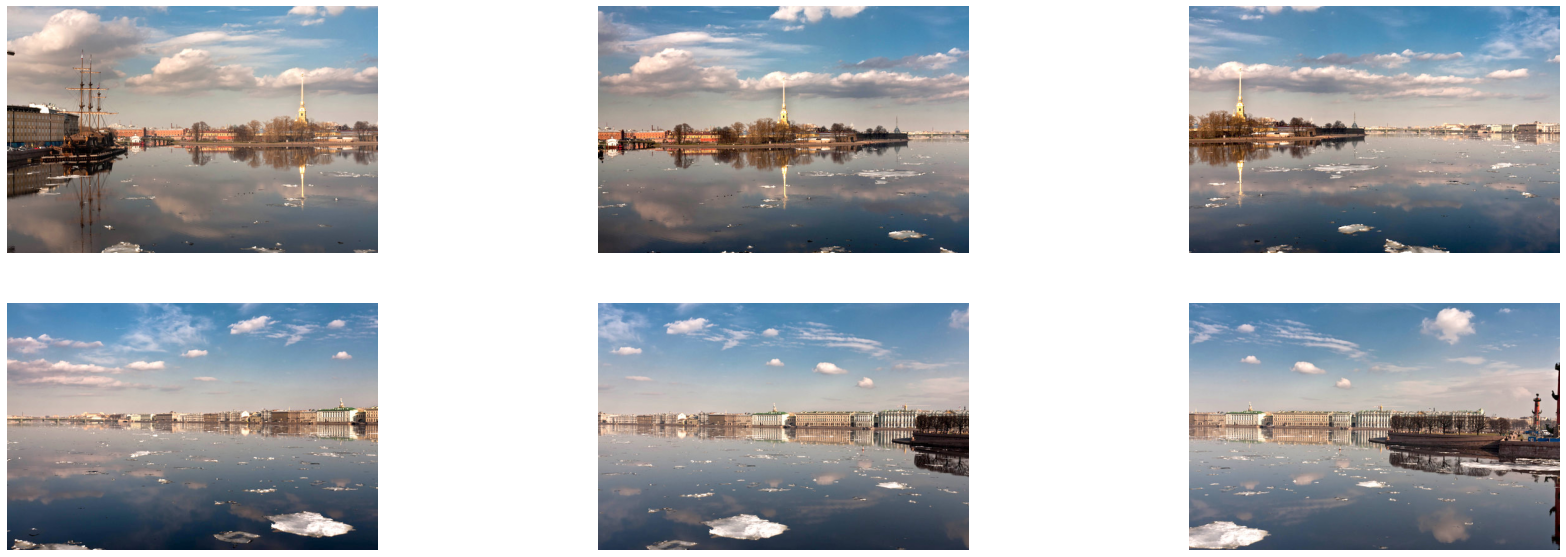

In [ ]:
# Display Images
plt.figure(figsize=[30,10])
num_cols = 3
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plt.axis('off')
  plt.imshow(images[i])


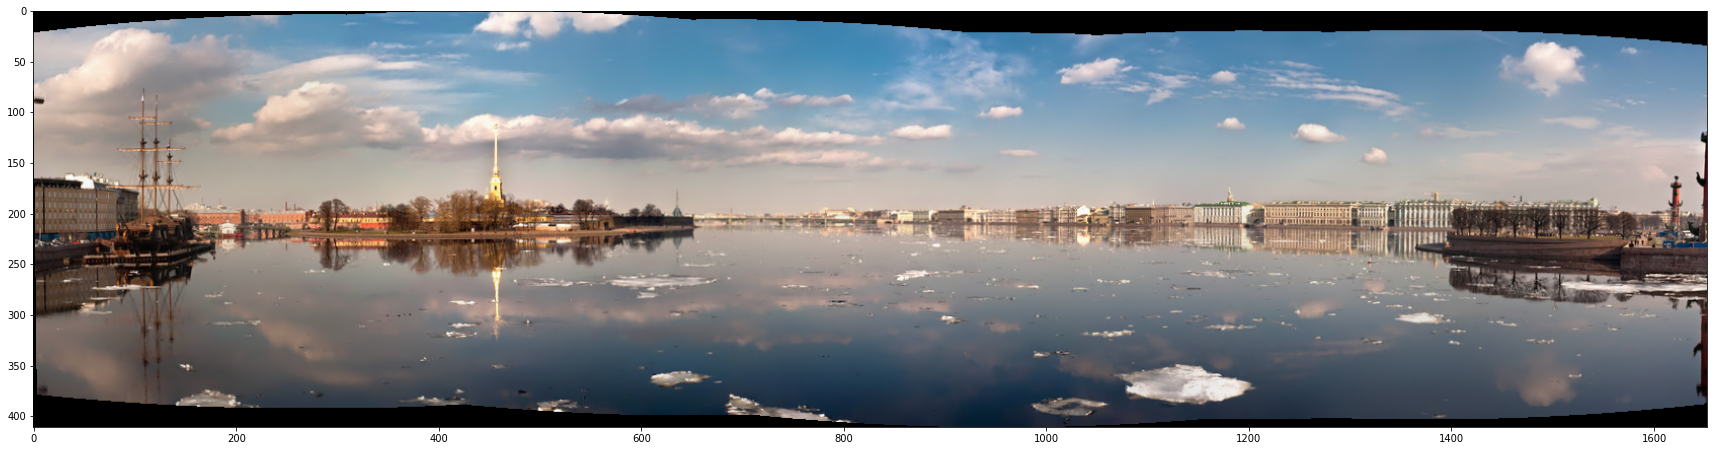

In [ ]:
# Stitch Images
stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch(images)
if status == 0:
  plt.figure(figsize=[30,10])
  plt.imshow(result)

#**Session 5**

## Camera Capture
Using a webcam to capture images for processing on the runtime.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))